#           OList Retail Dataset Analysis

## Problem Statement

**`OList is an e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.`**

**Steps performed in this Jupyter Notebook**

`1. Data exploration and cleaning:`
Identified missing and duplicate values in each column and treated them accordingly. Also, treated data quality issues associated with the dataset.

`2. EDA:`
Created appropriate visualisations to explore dataset.

`3. Market basket analysis:`
Using Apriori, dentified the combinations of product categories that are ordered frequently.

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the excel sheets one by one from the Retail Dataset

# A. Orders

In [2]:
# Reading the Orders sheet

orders = pd.read_excel("Retail_dataset (1).xlsx", sheet_name="orders")
orders.shape

(99441, 7)

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


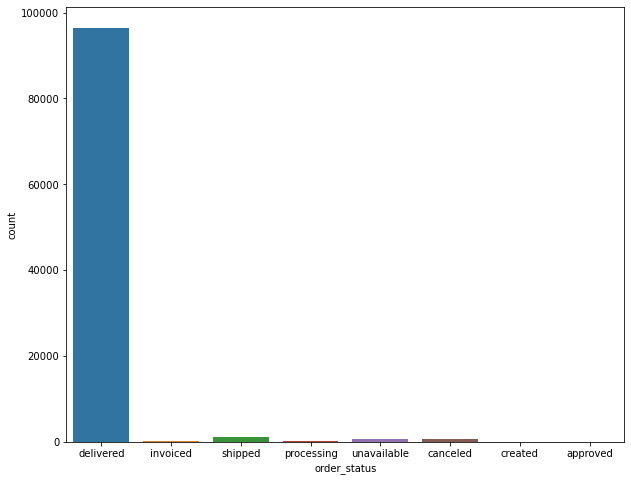

In [4]:
#Checking the differet 'order_status' and their counts.

plt.figure(figsize=(10,8))
sns.countplot(data=orders, x=orders['order_status'])
plt.show()

***As mentioned in the assignment, for this capstone, we have to consider only the cases having order status as 'delivered'. Rest are not useful for our analysis.***

In [5]:
#Checking the total number of 'delivered' orders

(orders.order_status=="delivered").sum()

96478

In [6]:
#Restricting the orders dataframe with order_status as 'delivered'. Therefore only delivered orders selected.

orders = orders[orders.order_status=="delivered"]
orders.shape

(96478, 7)

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [8]:
# Checking if order_id is duplicate.

orders["order_id"].duplicated().sum()

0

In [9]:
#Checking missing values.

orders.isnull().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [10]:
#Imputing values of order_approved_at with order_purchase_timestamp

orders.order_approved_at.fillna(orders.order_purchase_timestamp,inplace=True)

#Imputing values of order_delivered_timestamp with order_estimated_delivery_date

orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [11]:
#Checking again if any missing values are left.

orders.isnull().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

# B. Order_items

In [12]:
# Reading the Order_items sheet

order_items = pd.read_excel("Retail_dataset (1).xlsx", sheet_name="order_items")
order_items.shape

(112650, 6)

In [13]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [14]:
#Checking missing values.

order_items.isnull().sum().sort_values(ascending=False)


order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [15]:
# Checking if order_id is duplicate.

order_items["order_id"].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
112645    False
112646    False
112647    False
112648    False
112649    False
Name: order_id, Length: 112650, dtype: bool

# C. Customers

In [16]:
# Reading the Customers sheet

customers = pd.read_excel("Retail_dataset (1).xlsx", sheet_name="customers")
customers.shape

(99441, 4)

In [17]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
# Checking Missing Values

customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
# Checking for duplicate values

customers.customer_id.duplicated().sum()

3345

In [20]:
# Dropping the duplicate values

customers.drop_duplicates(subset="customer_id", keep="first", inplace= True)

In [21]:
customers.shape

(96096, 4)

In [22]:
# Checking if any duplicates left

customers.customer_id.duplicated().sum()

0

# D. Payments


In [23]:
# Reading the Payments sheet

payments = pd.read_excel("Retail_dataset (1).xlsx", sheet_name="payments")
payments.shape

(103886, 5)

In [24]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


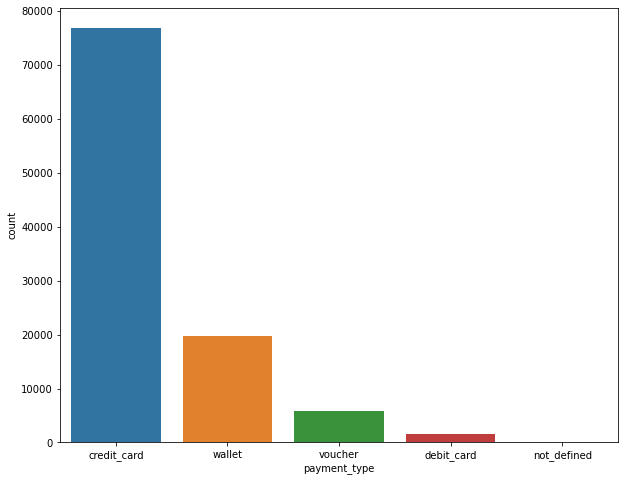

In [25]:
#Checking the most used 'payment_type' and their counts.

plt.figure(figsize=(10,8))
sns.countplot(data=payments, x=payments['payment_type'])
plt.show()

**`As per the following graph we can see that credit Card is the most used payment type for purchase.`**

In [26]:
#Checking the payments 'not defined' affected rows
payments[payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [27]:
# Since there are only 3 recors affected, we can drop these records.

i=payments[payments['payment_type']=='not_defined'].index
payments.drop(i, axis=0, inplace=True)

In [28]:
# Checking Missing values

payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# E. Products

In [29]:
# Reading the Products sheet

products = pd.read_excel("Retail_dataset (1).xlsx", sheet_name="products")
products.shape

(32951, 6)

In [30]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [31]:
# Checking the Missing Values

products.isna().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [32]:
#Checking the mode of "product_category_name" for imputing the categorical variable - 'product_category_name'

products["product_category_name"].mode()[0]

'toys'

In [33]:
#Imputing the product_category_name NULL values

products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace=True)

In [34]:
#Checking missing values again for remaing columns.

products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [35]:
#Checking the description of Numerical columns to gain insights on the NULL values of remaining columns
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


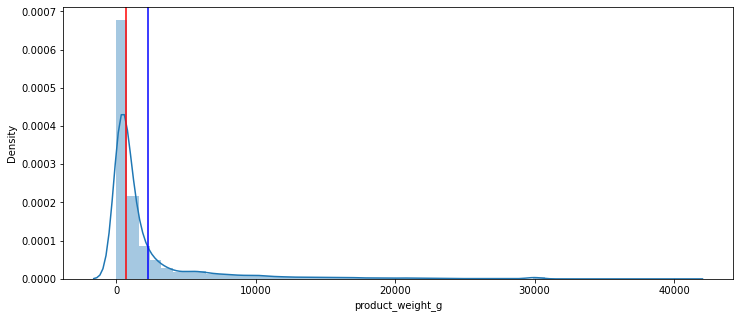

In [36]:
#Visualizing the product_weight_g for data skewness

plt.figure(figsize=(12,5))
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="blue")
plt.axvline(products.product_weight_g.median(), color="red")
plt.show()

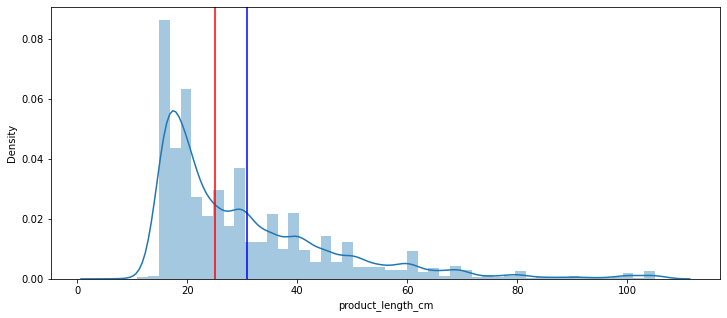

In [37]:
#Visualizing the product_length_cm for data skewness

plt.figure(figsize=(12, 5))
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="blue")
plt.axvline(products.product_length_cm.median(), color="red")
plt.show()

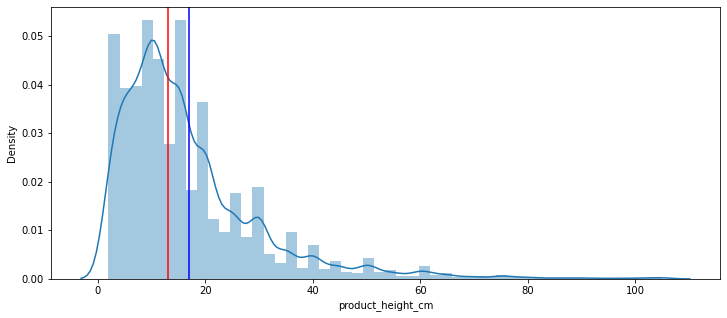

In [38]:
#Visualizing the product_height_cm for data skewness

plt.figure(figsize=(12,5))
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="blue")
plt.axvline(products.product_height_cm.median(), color="red")
plt.show()

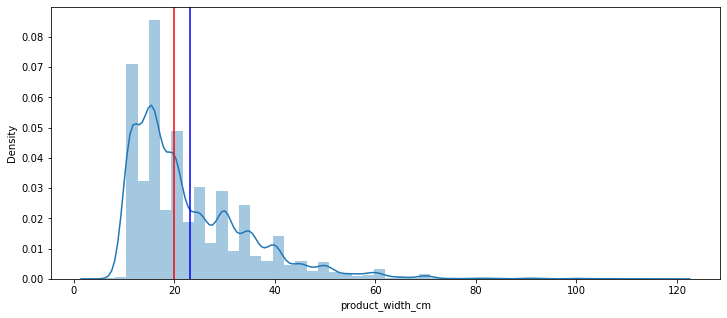

In [39]:
#Visualizing the product_width_cm for data skewness

plt.figure(figsize=(12,5))
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="blue")
plt.axvline(products.product_width_cm.median(), color="red")
plt.show()

In [40]:
#Imputing the missing values with appropriate method. Since all of them having right skewed distribution, therefore Median.

products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

In [41]:
#Validating missing values after imputing.

products.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

***Now, after all the sheets are cleaned and prepared, we will now merge the different datasets to use the final dataset for:***

` 1. Removing and treating the Outliers.  `

 `2. Market Basket analysis using appropriate techniques. `

 *The sheets will be merged accoring to the given Data Model.*


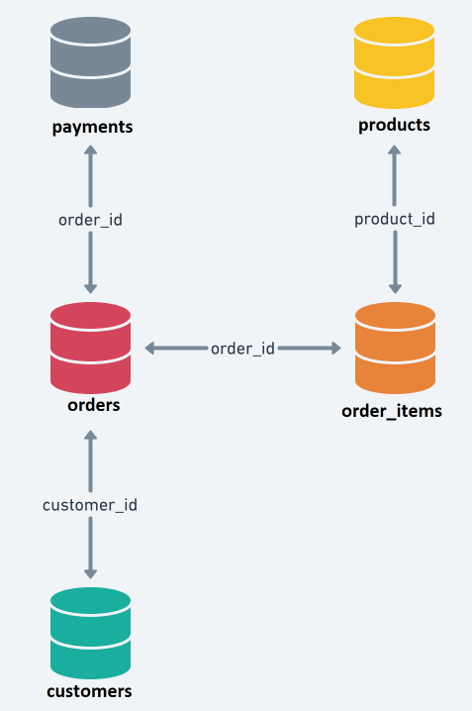

In [42]:
#Creating a new dataframe 'orders_delivered'. 
#This dataframe will contain the data merged using different dataframes.

#Merging 'orders' with 'order_items'

orders_delivered = pd.merge(orders,order_items,how='inner',on='order_id')

In [43]:
orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [44]:
#Merging 'orders_delivered' with 'products'

orders_delivered = pd.merge(orders_delivered,products,how='inner',on='product_id')

In [45]:
#Merging 'orders_delivered' with 'payments'

orders_delivered = pd.merge(orders_delivered,payments,how='inner',on='order_id')

In [46]:
#Merging 'orders_delivered' with 'customers'

orders_delivered = pd.merge(orders_delivered,customers,how='inner',on='customer_id')

In [47]:
# The final 'orders_delivered' dataframe

orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,...,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP


In [48]:
#Validating again if there are any NULLs, although we have taken care of all the NULLs seperately for all the sheets.

orders_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

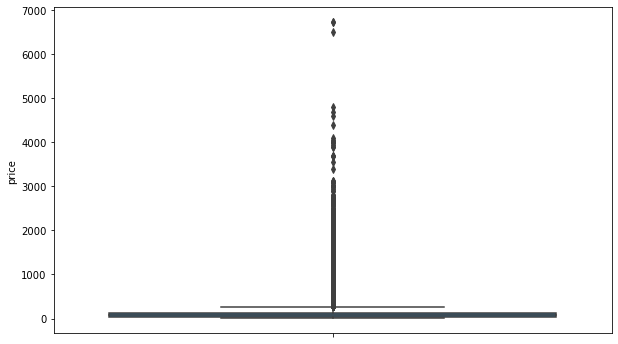

In [49]:
#Checking for 'price' outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=orders_delivered, y=orders_delivered['price'])
plt.show()

In [50]:
#Assuming that anything above the price of 3000 is too expensive and shall be removed.
#Therefore checking the records for further investigation 

orders_delivered[orders_delivered['price']>3000].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
37462,b239ca7cd485940b31882363b52e6674,ca27f3dac28fb1063faddd424c9d95fa,delivered,2018-07-29 08:39:48,2018-07-30 08:15:14,2018-07-31 23:03:28,2018-08-07,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,...,55.0,25.0,45.0,1,debit_card,1,4163.51,34018,nova lima,MG
37463,a53e05ecd2ed1f46a2b8e1f5828be7c6,bc5e25094a7d51b6aee35236572e64f4,delivered,2018-01-26 14:30:21,2018-01-27 14:35:51,2018-02-02 13:53:10,2018-02-15,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,...,55.0,25.0,45.0,1,credit_card,10,3826.80,35660,para de minas,MG
37655,3a4b013e014723cc38c9faa8ffdc6387,2c3b08cf3584d8c0a81d9618a73aa219,delivered,2018-04-09 11:32:37,2018-04-10 07:35:20,2018-04-13 02:06:43,2018-04-24,1,34f99d82cfc355d08d8db780d14aa002,a00824eb9093d40e589b940ec45c4eb0,...,39.0,95.0,42.0,1,credit_card,8,3526.46,19023,presidente prudente,SP
42087,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,...,47.0,25.0,25.0,1,wallet,1,6726.66,17506,marilia,SP
42677,1d54db601b417ccdfd3b7071955e6cc7,bbeb907759ef5fc169099af3c88d535d,delivered,2018-04-27 05:57:39,2018-04-28 10:29:50,2018-05-03 23:52:04,2018-05-15,1,6e729bd456c54469a9af4c8774f1eab7,039e6ad9dae79614493083e241147386,...,18.0,39.0,31.0,1,credit_card,5,3209.72,89113,gaspar,SC


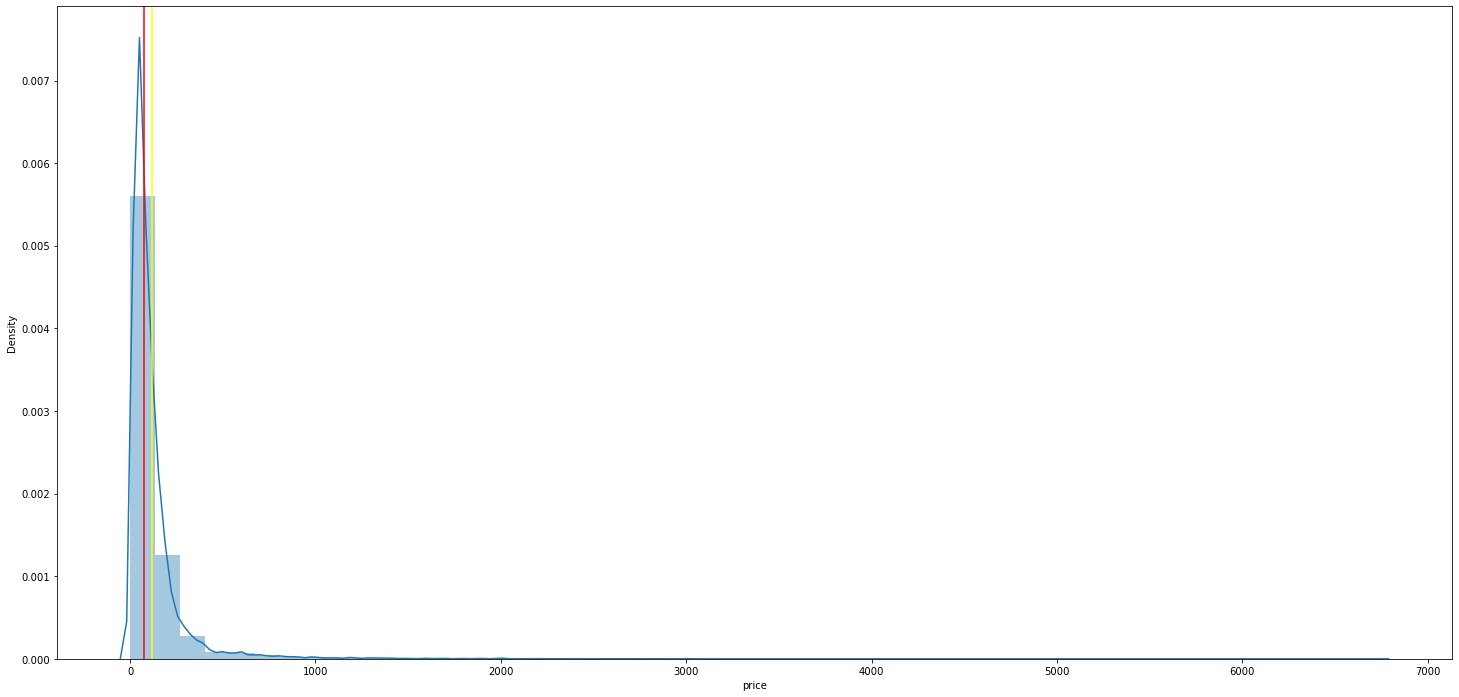

In [53]:
# Toys are usually not that costly, therefore the prices are outliers.
# Checking the correct measure for imputation using skewness

plt.figure(figsize=(25,12))
sns.distplot(orders_delivered.price)
plt.axvline(orders_delivered.price.mean(), color="yellow")
plt.axvline(orders_delivered.price.median(), color="red")
plt.show()


In [54]:
#Imputing the prices of Toys that are above 3000 with median

orders_delivered.loc[((orders_delivered['price']>3000) & (orders_delivered['product_category_name']=='toys')), 'price']=orders_delivered['price'].median()

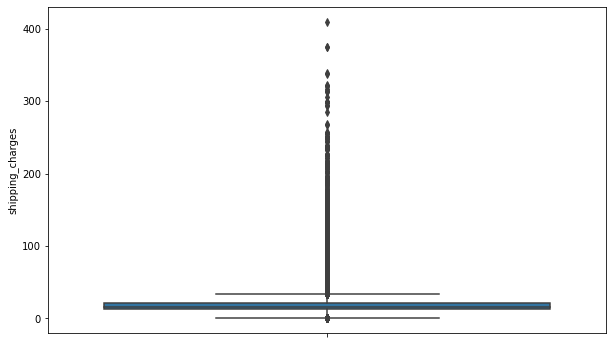

In [55]:
#Checkinh for 'shipping_charges' outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=orders_delivered, y=orders_delivered['shipping_charges'])
plt.show()

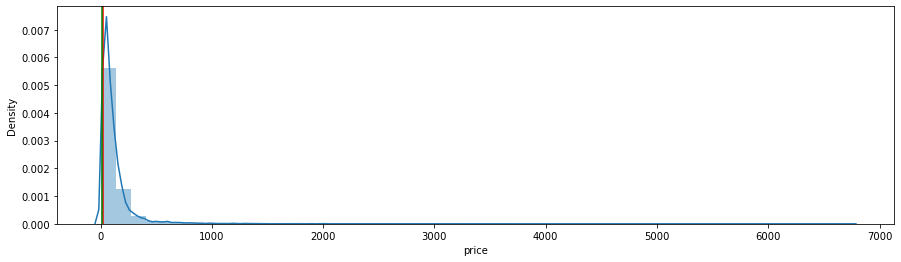

In [56]:
# Toys are usually not that costly, therefore the prices are outliers.
# Checking the correct measure for imputation using skewness

plt.figure(figsize=(15,4))
sns.distplot(orders_delivered.price)
plt.axvline(orders_delivered.shipping_charges.mean(), color="red")
plt.axvline(orders_delivered.shipping_charges.median(), color="green")
plt.show()

In [57]:
#Imputing the shipping_charges that are above 100 with median

orders_delivered.loc[orders_delivered['shipping_charges']>100, 'shipping_charges'] = orders_delivered['shipping_charges'].median()

# Market Basket Analysis 

`Our Approach:-`

**Association Rule Mining** is primarily used when you want to identify an association between different items in a set, then find frequent patterns in a transactional database, relational databases(RDBMS).

**Apriori Algorithm** is a widely-used and well-known Association Rule algorithm and is a popular algorithm used in market basket analysis. It is also considered accurate and overtop AIS and SETM algorithms. It helps to find frequent itemsets in transactions and identifies association rules between these items.

In [58]:
#Installing the package Machine learning Extension - mlxtend

!pip install mlxtend

In [59]:
#Load apriori and association modules from mlxtend.frequent_patterns 

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [60]:
#Updating orders_delivered dataframe with only the required columns for analysis

orders_delivered = orders_delivered[['order_id','product_category_name', 'order_item_id']]

In [61]:
#Checking the duplicates after updating

orders_delivered.duplicated().sum()

4841

In [62]:
#Dropping the duplicates keeping the first occurence

orders_delivered.drop_duplicates(keep='first', inplace=True)

In [63]:
#Creating prd_combo dataframe using pandas pivot, this is required for basket analysis

prd_combo = pd.pivot_table(data=orders_delivered,index='order_id',columns='product_category_name',
                              values='order_item_id',fill_value=0)

In [64]:
prd_combo.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
#For basket analysis encoding the data to 1s and 0s 
def encdata(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
prd_combo_encode = prd_combo.applymap(encdata)

In [66]:
prd_combo_encode.shape

(96477, 70)

In [67]:
#As reuired by the assignment, dropping the Product_cataegories (columns) whose sum value (total_sale) 
#is less than equal to 5

for column in prd_combo_encode.columns:
    if (prd_combo_encode[column].sum(axis=0, skipna=True)<=5):
        prd_combo_encode.drop(column, inplace=True, axis=1)



In [68]:
prd_combo_encode.shape

(96477, 61)

In [69]:
#Selecting only those order_ids where at least two items were purchased to find product combinations.
#This is reuired else the 'Toys' product_category will affect the whole analysis. 
#Because the Support value for 'Toys' is biased due to its too much presence as single item orders 

prd_combo_encode = prd_combo_encode[(prd_combo_encode>0).sum(axis=1)>=2]
prd_combo_encode.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Generating frequent itemsets from a list of items

First step in generation of association rules is to get all the frequent itemsets.Frequent itemsets are the ones which occur at least a minimum number of times in the transactions.

In [72]:
'''Call apriori function and passing minimum support here we are passing 3%, which means at least 3% in total number 
   of transaction the item should be present.'''
#Support - This measure gives an idea of how frequent `ItemSet` is in all the transactions.

frequent_items = apriori(prd_combo_encode, min_support=0.03, use_colnames=True)
frequent_items

C:\Users\karti\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031201,(auto)
1,0.230889,(bed_bath_table)
2,0.084243,(computers_accessories)
3,0.032761,(fashion_bags_accessories)
4,0.127145,(furniture_decor)
5,0.042122,(garden_tools)
6,0.066303,(health_beauty)
7,0.053822,(housewares)
8,0.055382,(sports_leisure)
9,0.971139,(toys)


## Generating all possible rules from the frequent itemsets.

After the frequent itemsets are generated, identifying rules such as Confidence and Lift.



In [73]:
#We would apply association rules on frequent itemset to find product combinations. 
#Confidence - This measure defines the likeliness of occurrence of consequent on the cart given that the cart 
#already has the antecedents.

rules_conf = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules_conf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446
1,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
2,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
3,(computers_accessories),(toys),0.084243,0.971139,0.080343,0.953704,0.982047,-0.001469,0.623401
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168
5,(furniture_decor),(toys),0.127145,0.971139,0.119345,0.938650,0.966546,-0.004131,0.470437
6,(toys),(furniture_decor),0.971139,0.127145,0.119345,0.122892,0.966546,-0.004131,0.995151
7,(garden_tools),(toys),0.042122,0.971139,0.035101,0.833333,0.858099,-0.005805,0.173167
8,(health_beauty),(toys),0.066303,0.971139,0.063183,0.952941,0.981262,-0.001207,0.613300
9,(housewares),(toys),0.053822,0.971139,0.049142,0.913043,0.940178,-0.003127,0.331903


In [74]:
#Lift - This measure defines the likeliness of occurrence of consequent on the cart given that the cart already 
#has the antecedent, but controlling the popularity of consequent.
#Here we are setting based on lift and keeping minimum lift as >1.

rules_lift=rules_conf[(rules_conf['lift'] > 1)]
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446
1,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
2,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168
11,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293


***As required by the assignment, cleaned datasets are needed, therefore Exporting cleaned dataset to an excel and other Market Basket metrics data to create dashboard using Tableau.***

In [75]:
#Extracting the clean datasheets to be uploaded
with pd.ExcelWriter(r"C:\Users\karti\OneDrive\Desktop\Clean_Retail_dataset.xlsx") as excel_sheets:
    #Extracting the clean datasheets
    orders.to_excel(excel_sheets, sheet_name="orders", index=False)
    order_items.to_excel(excel_sheets, sheet_name="order_items", index=False)
    products.to_excel(excel_sheets, sheet_name="products", index=False)
    customers.to_excel(excel_sheets, sheet_name="customers", index=False)
    payments.to_excel(excel_sheets, sheet_name="payments", index=False)
    
#Extracting the additional markest basket metrics data to be visualized
#Taking care of the frozenset before exporting
frequent_items["itemsets"] = frequent_items["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_conf["antecedents"] = rules_conf["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_conf["consequents"] = rules_conf["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_lift["antecedents"] = rules_lift["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_lift["consequents"] = rules_lift["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

with pd.ExcelWriter(r"C:\Users\karti\OneDrive\Desktop\Apriori_Market_basket.xlsx") as excel_sheets:    
    frequent_items.to_excel(excel_sheets, sheet_name="support", index=False)
    rules_conf.to_excel(excel_sheets, sheet_name="confidence", index=False)
    rules_lift.to_excel(excel_sheets, sheet_name="lift", index=False)